In [8]:
from utils.load_model import load

path_to_model_folder = './trained_models/shape/model_cont8_cross_lr5e4/'

model = load(path_to_model_folder)

In [1]:
from utils.load_model import load

path_to_model_folder = './trained_models/arabic/model_cont8_cross_lr5e4_disc40/'

model = load(path_to_model_folder)

In [2]:
from viz.visualize import Visualizer as Viz

print(model.latent_spec)
# Create a Visualizer for the model
viz = Viz(model)
viz.save_images = True  # Return tensors instead of saving images

{'cont': 8, 'disc': [40, 28, 14, 1]}


# Samples

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

samples = viz.samples(size=(10, 10), filename=path_to_model_folder + "samples.png")
# plt.imshow(samples.numpy()[0, :, :], cmap='gray')

# Traversals

In [4]:
traversals = viz.all_latent_traversals(size=model.latent_spec['disc'][0], filename=path_to_model_folder + "traversal.png")
#plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

In [5]:
traversals = viz.all_latent_traversals(size=28, filename=path_to_model_folder + "traversal.png")

# Different Traversals

In [5]:
import os
if not os.path.exists(path_to_model_folder + "traversals/"):
    os.makedirs(path_to_model_folder + "traversals/")

In [6]:
for i in range(model.latent_spec['cont']):
    traversals = viz.latent_traversal_grid(cont_idx=i, cont_axis=1, disc_idx=0, disc_axis=0, size=(model.latent_spec['disc'][0], model.latent_spec['cont']),
                                           filename=path_to_model_folder+ "traversals/" + "travers_%s.png" % i)

# Reconstructions

In [11]:
from utils.dataloaders import get_arabic_dataloader, get_shape_dataloader

# Get test data
# dataloader = get_arabic_dataloader(batch_size=32, path_to_data="data/HandwrittenArabic/Test Images 3360x32x32/test")
dataloader = get_shape_dataloader(batch_size=32, path_to_data="data/Shape/shapes")

# Extract a batch of data
for batch, labels in dataloader:
    break

recon = viz.reconstructions(batch, size=(8, 8), filename=path_to_model_folder + "recon.png")

# Compare Plots

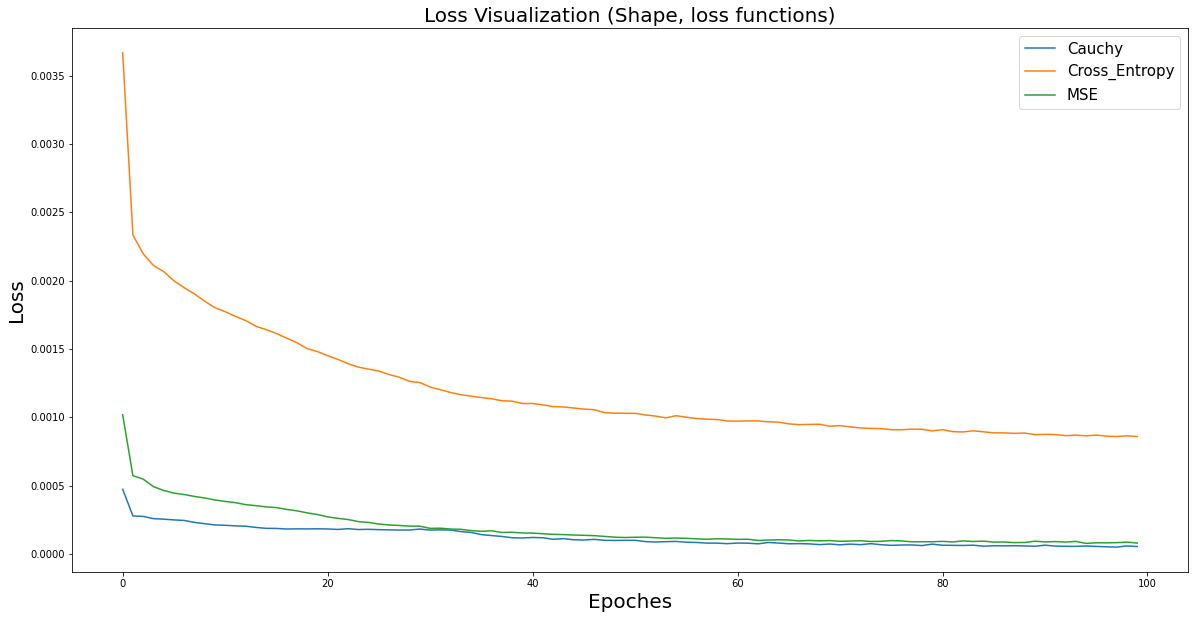

In [34]:
import matplotlib.pyplot as plt
import numpy as np

title = "Loss Visualization (Shape, loss functions)"
save = "./trained_models/RESULTS/shape/loss/"
path1 = './trained_models/shape/model_cont8_cauchy_lr5e4/Mean_loss.txt'
path2 = './trained_models/shape/model_cont8_cross_lr5e4/Mean_loss.txt'
path3 = './trained_models/shape/model_cont8_MSE_lr5e4/Mean_loss.txt'
car1 = "Cauchy"
car2 = "Cross_Entropy"
car3 = "MSE"
loss_list = [(car1, path1), (car2, path2), (car3, path3)]

loss_list = [(i[0], np.loadtxt(i[1])) for i in loss_list]
fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylabel("Loss", fontsize=20)
ax.set_xlabel("Epoches", fontsize=20)
ax.set_title(title, fontsize=20)
x = np.arange(len(loss_list[0][1]))
for name, i in loss_list:
    ax.plot(x, i, label=name)
ax.legend(fontsize=15)
plt.savefig(save + "visualization_loss.png")